In [14]:
%matplotlib inline

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from IPython import display

import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import keras

In [16]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [17]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [18]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Training label shape", Y_train.shape)
print("Testing label shape", Y_test.shape)

Training label shape (60000, 10)
Testing label shape (10000, 10)


In [19]:
def next_plot_data(accuracy):
    labeled_count = y_labeled.shape[0]
    return np.append(plot_data, [[labeled_count, accuracy]], axis=0)

def show_plot():
    plt.clf()
    plt.plot(plot_data[:,0], plot_data[:,1])
    display.display(plt.gcf())
    display.clear_output(wait=True)

def next_label_index():
    predictions = model.predict(X_train)
    std = np.std(predictions, axis=1)
    return std.argmin()

def accuracy():
    return model.evaluate(X_test, Y_test, verbose=0)[1]

In [20]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_labeled = np.empty((0,) + X_train.shape[1:])
y_labeled = np.empty((0,) + Y_train.shape[1:])

plot_data = np.empty((0, 2))

KeyboardInterrupt: 

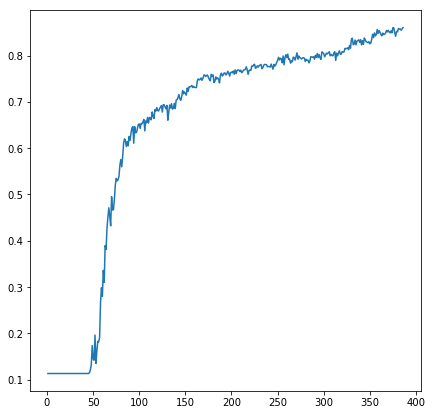

In [22]:
while accuracy() < 0.9:
    index = next_label_index()

    x_index = X_train[index:index+1]
    y_index = Y_train[index:index+1]

    x_labeled = np.append(x_labeled, x_index, axis=0)
    y_labeled = np.append(y_labeled, y_index, axis=0)

    X_train = np.delete(X_train, index, 0)
    Y_train = np.delete(Y_train, index, 0)
    
    model.fit(x_labeled, y_labeled, batch_size=128, epochs=12, verbose=0)
    
    a = accuracy()
    plot_data = next_plot_data(a)
    print("Labeled count: ", y_labeled.shape[0])
    print("Accuracy: ", a)
    show_plot()